 # Scraping the top Repositories for Topics on GitHub

### Introduction:
Web Scraping:-web scraping is the process of extractiong  data from websites using python programming.
             it involved fecthing HTML content of webpage and parsing it to extract the specific information 
             and then stored that data in specific format.
       

#GitHub:-GitHub is a cloud-based platform where you can store, share,and work together with others to write code. 
         Storing your code in a "repository" on GitHub allows you to:
         ->Showcase or share your work.
         ->Track and manage changes to your code over time.             
      

### problem statement:-
            The goal of this project is to extract and analyze the top repositories for various topics onGitHub. 
            GitHub, being one of the largest platforms for hosting and sharing code, has an immense repository of projects                 across numerous topics.
            However, manually searching for and curating the most relevant and popular repositories can be time-consuming and               inefficient.
            This project aims to automate the process of collecting information on the top repositories for different topics on             GitHub using web scraping techniques. By doing so, the project provides a structured dataset that includes key                 details about these repositories, such as repository name, author, star count, and description, allowing users to               easily identify and analyze the most influential projects within specific domains.





##Tools Used for This Project:
Python
Requests
BeautifulSoup
Pandas



###Steps Followed:
1)Scrape Topics:
We're going to scrape GitHub Topics.
We'll get a list of topics. For each topic, we'll extract the topic title, topic page URL, and topic description.

2)Extract Top Repositories:
For each topic, we'll get the top 25 repositories from the topic page.
For each repository, we'll extract the repo name, username, stars, and repo URL.

3)Store Data:
For each topic, we'll create a CSV file in the following format:

Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx



# scrape the list of topic from GitHub:
-use the request to download the page.
-use the BS4 to extract and parse the information.
-then convert data into pandas dataframe.
-let's write the function to download the page.
                                                      

In [2]:
#import the libraries that are needed:
import os
import requests
from bs4 import BeautifulSoup

def get_topics_page():
    #this is the github topic link using this we are going to fetcg the topics 
        topic_url="https://github.com/topics"
        response=requests.get(topic_url)
     # Check if the request was successful
        if response.status_code != 200:
            raise Exception('Failed to Download Page{}'.format(topic_url))
     # Only parse the page if the response is successful
        doc=BeautifulSoup(response.text,'html.parser')
        return doc


In [3]:
doc=get_topics_page()    


In [4]:
doc


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-efd2f2257c96.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-6b1e37da2254.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/

### let's create some helper function to parse the information from page:


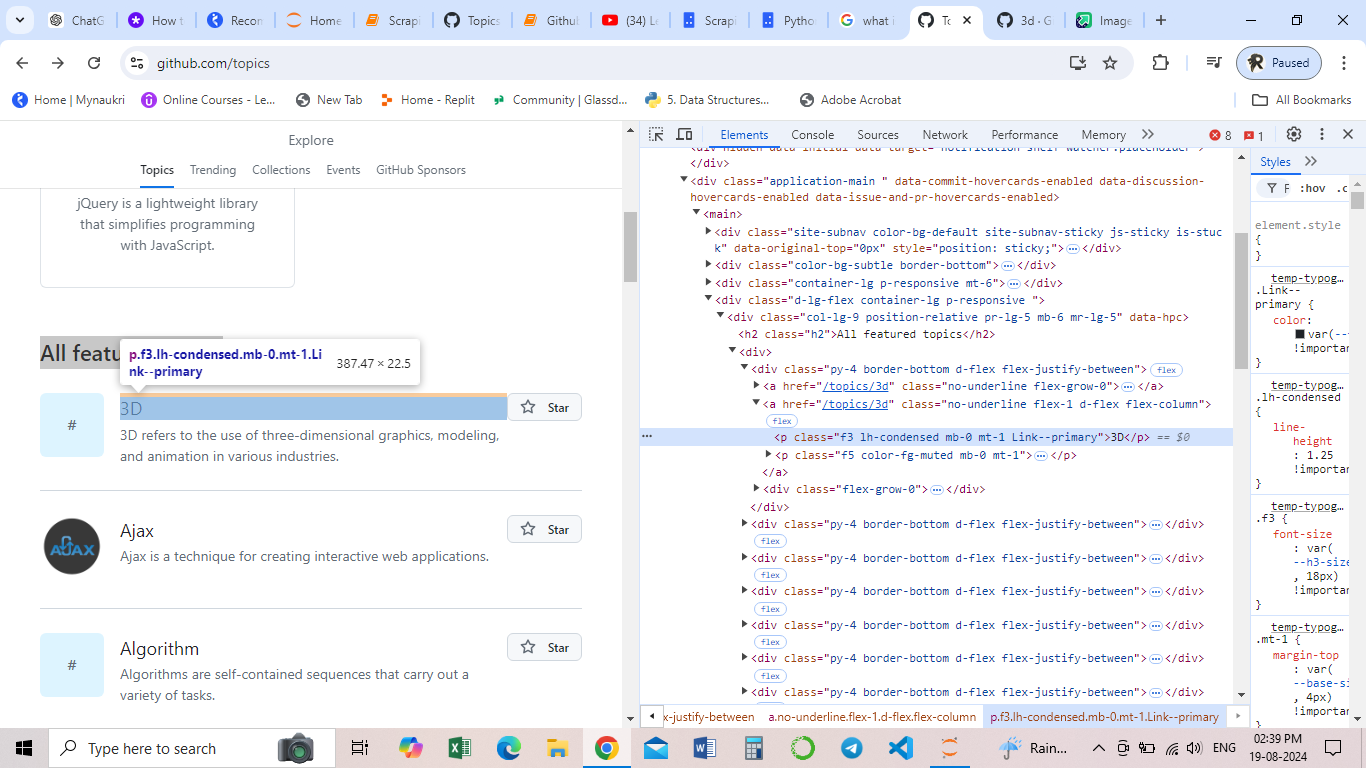

In [4]:
from IPython.display import Image
Image(filename='C:\\Users\\DELL\\Desktop\\title.png')

#to get the topic title we pick  the 'p' tag with the class 'f3 lh-condensed mb-0 mt-1 Link--primary'

In [6]:
#from the below function we get the topic title:
def get_topic_title(doc):
    selection_class='f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tag=doc.find_all('p',{'class':selection_class})
    #i want to fech the text from topic title:
    topic_titles=[]
    for tag in topic_title_tag:
        topic_titles.append(tag.text)
    return topic_titles     
#get_topic_title(doc) can be used to get the list of topics:

In [20]:
titles=get_topic_title(doc)
titles

['3D',
 'Ajax',
 'Algorithm',
 'Amp',
 'Android',
 'Angular',
 'Ansible',
 'API',
 'Arduino',
 'ASP.NET',
 'Awesome Lists',
 'Amazon Web Services',
 'Azure',
 'Babel',
 'Bash',
 'Bitcoin',
 'Bootstrap',
 'Bot',
 'C',
 'Chrome',
 'Chrome extension',
 'Command-line interface',
 'Clojure',
 'Code quality',
 'Code review',
 'Compiler',
 'Continuous integration',
 'C++',
 'Cryptocurrency',
 'Crystal']

In [7]:
len(titles)

30

In [8]:
titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

### simillarly we have defined the functions for Description and Url

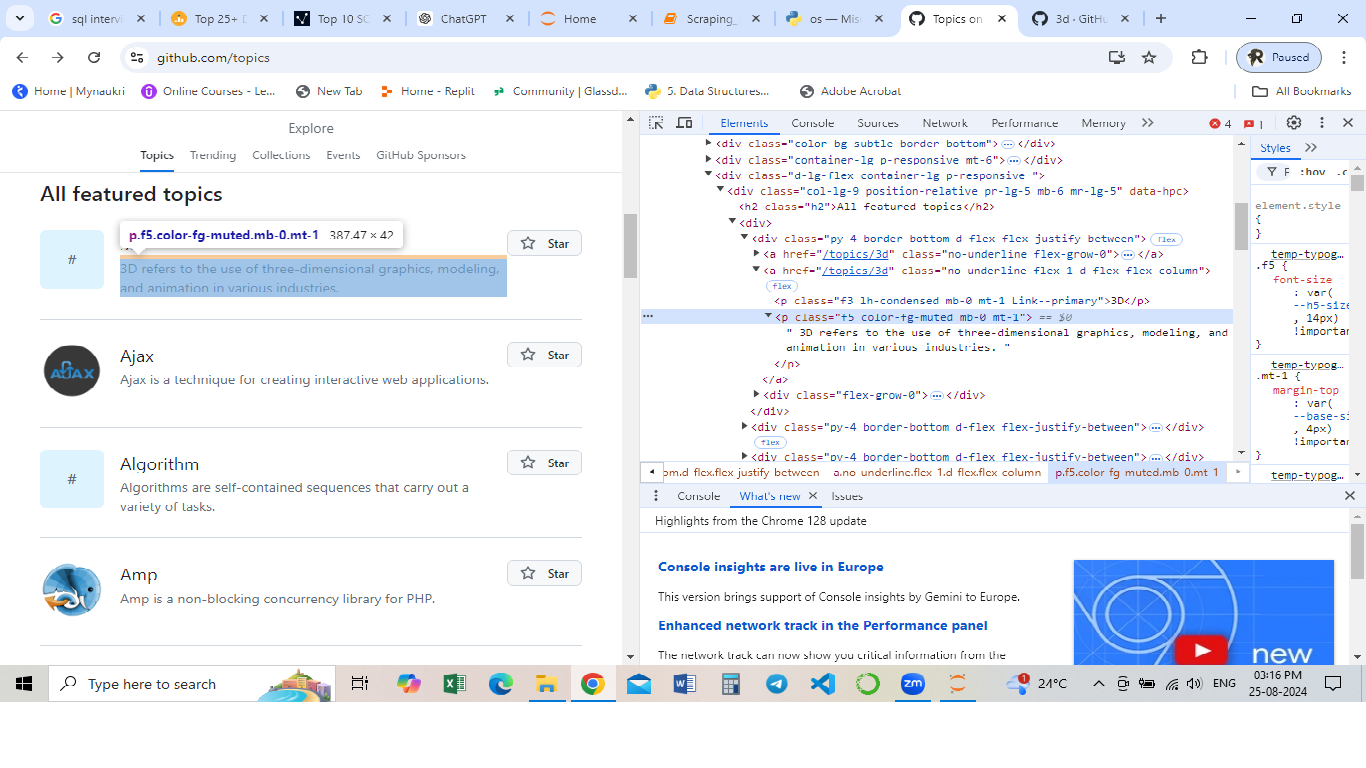

In [8]:
from IPython.display import Image
Image(filename='C:\\Users\\DELL\\Desktop\\Discreption.png')

#to get the topic description we pick  the 'p' tag with the class 'f5 color-fg-muted mb-0 mt-1'

In [22]:
#using the following function we get the description: 
def  get_topic_description(doc):
    #let's grab the topic descriptions:
    topic_description_tag=doc.find_all('p',{'class':'f5 color-fg-muted mb-0 mt-1'})
    topic_description=[]
    for tag in topic_description_tag:
        topic_description.append(tag.text.strip())
    return topic_description


In [23]:
description=get_topic_description(doc)

In [24]:
len(description)

30

In [25]:
description[:5]

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

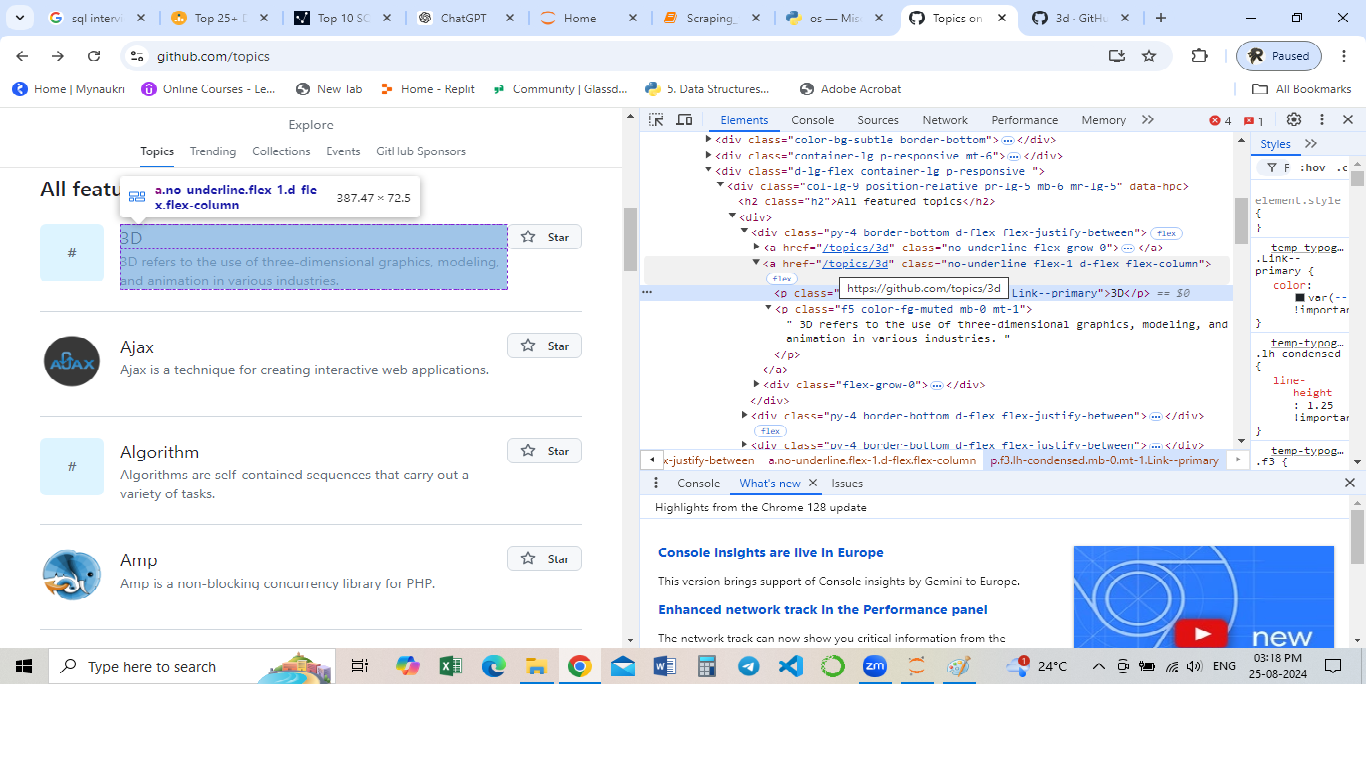

In [9]:
from IPython.display import Image
Image(filename='C:\\Users\\DELL\\Desktop\\Url.png')
#to get the topic url we pick  the 'a' tag with the class 'no-underline flex-1 d-flex flex-column'

In [16]:
#this function code  will hepl to get the topic url:
def get_topic_url(doc):
    topic_link_tag=doc.find_all('a',{'class':'no-underline flex-1 d-flex flex-column'})
    topic_url=[]
    base_url='https://github.com'
    for tag in topic_link_tag:
        topic_url.append(base_url + tag['href'])
    return topic_url


In [26]:
url=get_topic_url(doc)

In [27]:
len(url)

30

In [28]:
url[:5]

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android']

### now let's put all this together into a single function:

In [48]:
import pandas as pd
def scrape_topics():
        topic_url="https://github.com/topics"
        response=requests.get(topic_url)
        if response.status_code != 200:
            raise Exception('Failed to Download Page{}'.format(topic_url))
        doc=BeautifulSoup(response.text,'html.parser')
        topics_dictionary={
            'title':get_topic_title(doc),
            'descriptions':get_topic_description(doc),
            'url':get_topic_url(doc)
        }    
        return pd.DataFrame(topics_dictionary)


In [49]:
scrape_topics()

,title,descriptions,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


# Get Top 25 Repositories from a Topic Page:

In [50]:
def get_topic_page(topic_url):
    #download the page
    response1=requests.get(topic_url)
    #checking success response:
    if response1.status_code != 200:
        raise Exception('Failed to load a page{}'.format(topic_url))
    #pars html page using BeautifulSoup     
    topic_doc=BeautifulSoup(response1.text, 'html.parser') 
    return topic_doc


In [61]:
topic_url="https://github.com/topics"

topic_doc=get_topic_page(topic_url)

In [62]:

#talk about the H3 tag here:
topic_doc


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-efd2f2257c96.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-6b1e37da2254.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/

In [63]:
base_url='https://github.com'

def parse_count_stars(star_str):
    if star_str[-1]=='k':
        return int((float(star_str[:-1]))*1000)
    return int(star_str)


def get_repo_info(h3_tag,star_tag):
    # return all the information about a repository:
    a_tags=h3_tag.find_all('a')
    username=a_tags[0].text.strip()
    repo_name=a_tags[1].text.strip()
    repo_url=base_url + a_tags[1]['href']
    star=parse_count_stars(star_tag.text.strip())
    return  username, repo_name,star,repo_url


In [64]:
def get_topic_repos(topic_doc):
        #get h3 tag containing the title,repo url and username:
    repo_tag=topic_doc.find_all('h3',{'class':'f3 color-fg-muted text-normal lh-condensed'})
    #get star tags:
    star_tags=topic_doc.find_all('span',{'class':'Counter js-social-count'})
    #get repo info:
    topic_repo_dic={
    'username':[],
    'repo_name':[],
    'star':[],
    'repo_url':[]
     }

    for i in range(len(repo_tag)):
        repo_info=get_repo_info(repo_tag[i],star_tags[i])
        topic_repo_dic['username'].append(repo_info[0])
        topic_repo_dic['repo_name'].append(repo_info[1])
        topic_repo_dic['star'].append(repo_info[2])
        topic_repo_dic['repo_url'].append(repo_info[3])

    return pd.DataFrame(topic_repo_dic)


def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print('The file {} already exists, skipping...'.format(path))
        return  # Exit the function if the file already exists
    # Scrape the repositories and save to CSV
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)
    print('Data saved to {}'.format(path))



In [65]:
repoinfo=get_topic_repos(get_topic_page(topic_url))

In [72]:
#get_topic_repos(topic_doc)
topic_df = get_topic_repos(get_topic_page('https://github.com/mrdoob/three.js'))
topic_df

,username,repo_name,star,repo_url


In [74]:
topic_url="https://github.com/topics"
url4=topic_url[4]
topic4_doc=get_topic_page(url4)
topic4_repo=get_topic_repos(topic4_doc)
topic4_repo

MissingSchema: Invalid URL 's': No scheme supplied. Perhaps you meant https://s?

In [33]:
    
def scrape_topic_repos():
    print('Scraping list of topics:')
    topics_df = scrape_topics()  # Assuming scrape_topic returns a DataFrame with 'title' and 'url'
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'data/' + row['title'] + '.csv')





In [26]:
scrape_topic_repos()

Scraping list of topics:
Scraping top repositories for "3D"
The file data/3D.csv already exists, skipping...
Scraping top repositories for "Ajax"
The file data/Ajax.csv already exists, skipping...
Scraping top repositories for "Algorithm"
The file data/Algorithm.csv already exists, skipping...
Scraping top repositories for "Amp"
The file data/Amp.csv already exists, skipping...
Scraping top repositories for "Android"
The file data/Android.csv already exists, skipping...
Scraping top repositories for "Angular"
The file data/Angular.csv already exists, skipping...
Scraping top repositories for "Ansible"
The file data/Ansible.csv already exists, skipping...
Scraping top repositories for "API"
The file data/API.csv already exists, skipping...
Scraping top repositories for "Arduino"
The file data/Arduino.csv already exists, skipping...
Scraping top repositories for "ASP.NET"
The file data/ASP.NET.csv already exists, skipping...
Scraping top repositories for "Awesome Lists"
The file data/Awe